In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

In [5]:
iris = load_iris()
X = iris.data[:, [0, 2]] # Usage: [sepal length, petal length]
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y
    )

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)

In [10]:
ppn.fit(X_train_std, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,40
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,1


In [12]:
y_pred = ppn.predict(X_test_std)

In [13]:
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Misclassified examples: 10
Accuracy: 0.778

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.47      0.58        15
           2       0.62      0.87      0.72        15

    accuracy                           0.78        45
   macro avg       0.80      0.78      0.77        45
weighted avg       0.80      0.78      0.77        45



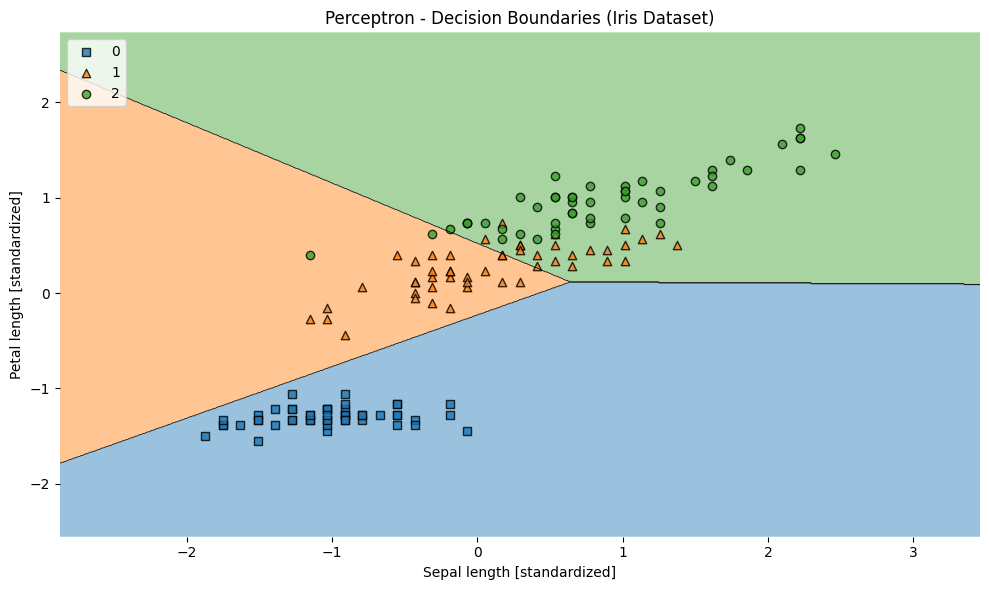

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(10, 6))
plot_decision_regions(X_combined_std, y_combined,ppn)
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.title('Perceptron - Decision Boundaries (Iris Dataset)')
plt.tight_layout()
plt.show()